In [21]:
#remove outliers from the air quality data set
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt

#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)
aqDataSet.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,5463.000000,5463.000000,5463.0,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000
mean,1.901135,1076.459027,-200.0,9.281789,920.530890,220.711441,808.396058,110.074794,1408.268351,997.346086,18.593778,47.945052,1.019410
std,1.068772,174.429823,0.0,5.726028,220.527078,148.103930,196.167067,43.057097,333.548264,334.338003,9.325558,17.704623,0.421377
min,0.100000,666.750000,-200.0,0.423729,431.250000,2.000000,359.750000,2.000000,601.000000,287.750000,-1.900000,9.175000,0.184679
25%,1.100000,942.000000,-200.0,4.755590,751.000000,103.000000,664.625000,78.000000,1155.500000,744.125000,11.625000,34.000000,0.696732
50%,1.700000,1057.000000,-200.0,8.141759,905.000000,184.000000,787.250000,108.000000,1417.750000,970.500000,18.325000,47.875000,1.009018
75%,2.600000,1191.500000,-200.0,12.883302,1079.750000,310.000000,927.250000,137.850000,1647.500000,1225.125000,25.100000,61.575000,1.315422
max,5.600000,1667.000000,-200.0,28.008952,1503.500000,634.000000,1444.750000,252.900000,2366.750000,2029.750000,43.424999,88.725000,2.180639


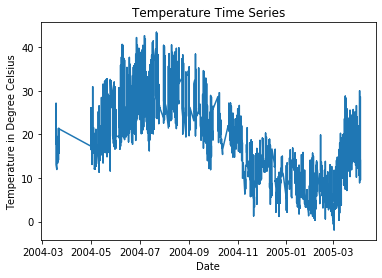

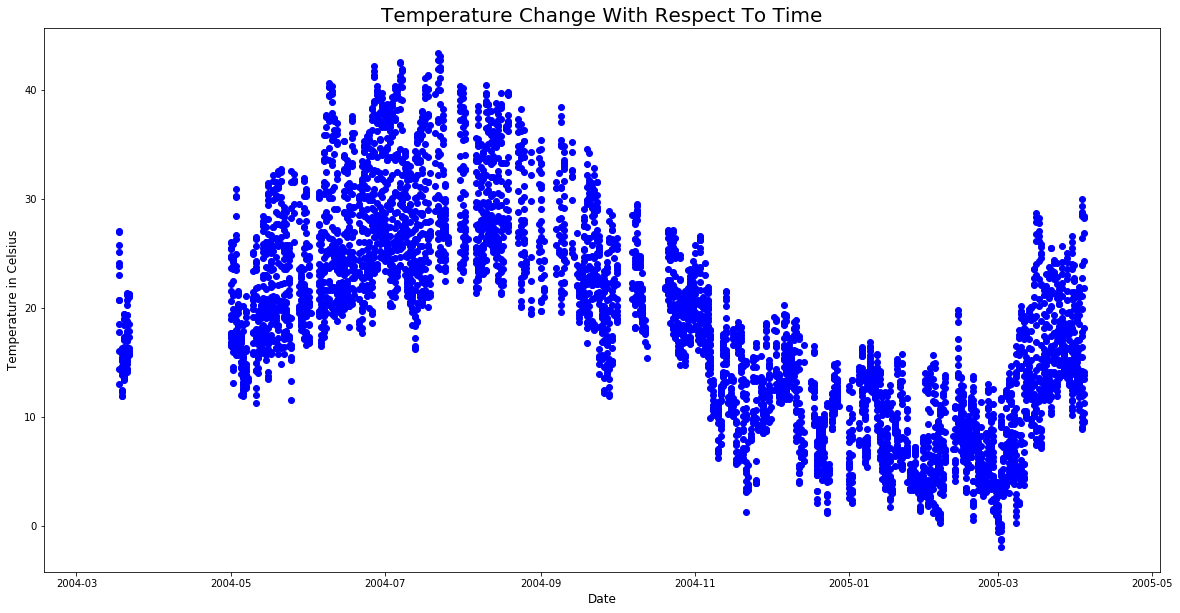

In [19]:
# The Temperature Change With Respect To Time
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


dataslice = aqDataSet[['Date','T']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['T']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['T'])

plt.title('Temperature Time Series')

plt.xlabel('Date')
plt.ylabel('Temperature in Degree Celsius')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Temperature Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Temperature in Celsius", fontsize = 12)
plt.show()








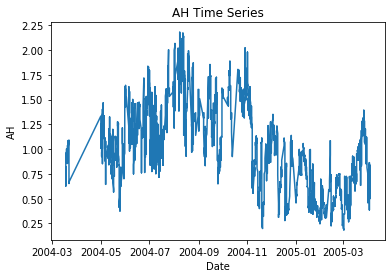

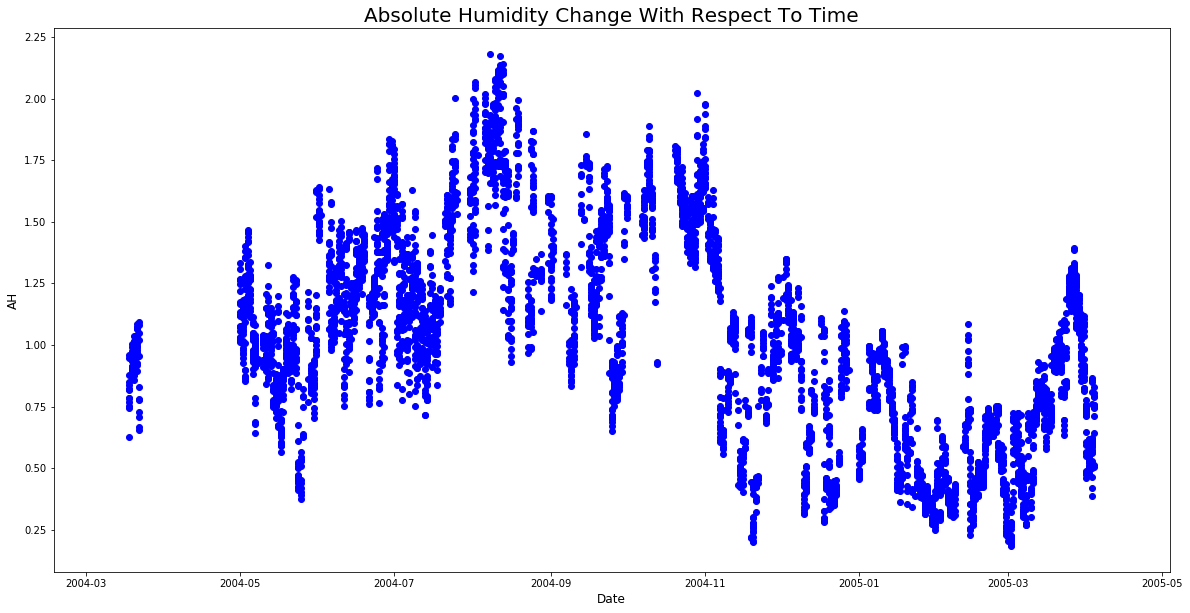

In [22]:
#Absolute Humidity Change With Respect To Time
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)


dataslice = aqDataSet[['Date','AH']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['AH']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['AH'])

plt.title('AH Time Series')

plt.xlabel('Date')
plt.ylabel('AH')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Absolute Humidity Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("AH", fontsize = 12)
plt.show()




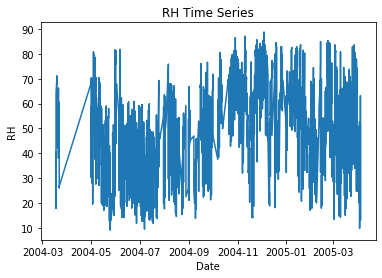

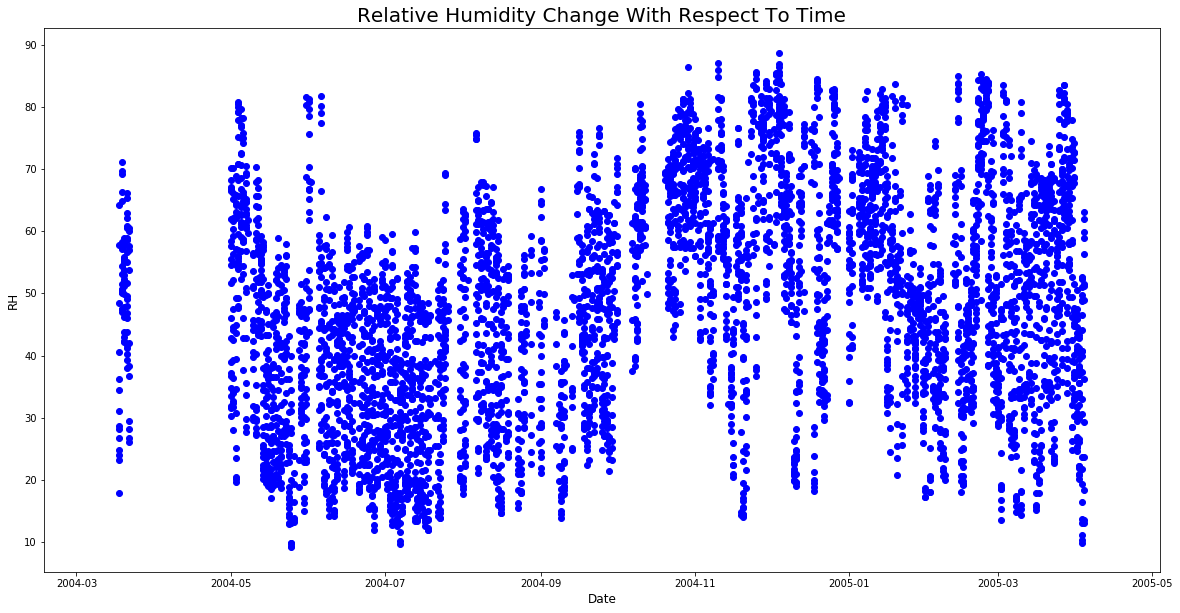

In [24]:
#Relative Humidity Change With Respect To Time
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)

dataslice = aqDataSet[['Date','RH']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['RH']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['RH'])

plt.title('RH Time Series')

plt.xlabel('Date')
plt.ylabel('RH')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Relative Humidity Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("RH", fontsize = 12)
plt.show()

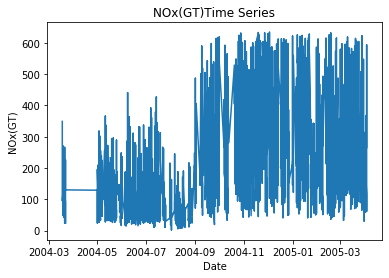

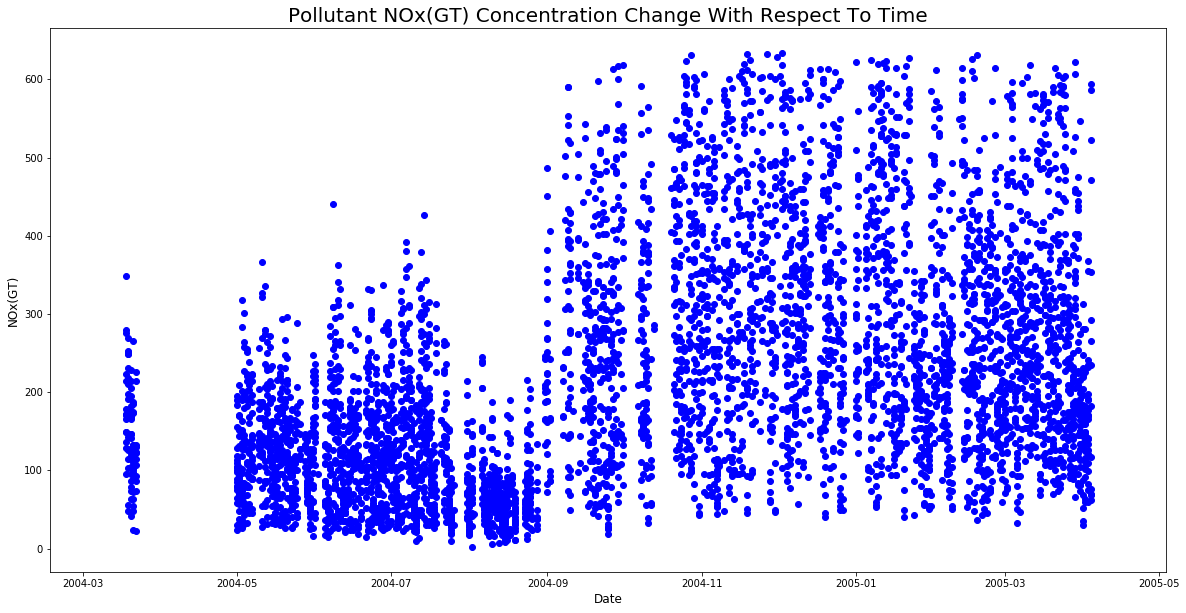

In [25]:
#NOx(GT)
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)




dataslice = aqDataSet[['Date','NOx(GT)']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['NOx(GT)']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['NOx(GT)'])

plt.title('NOx(GT)Time Series')

plt.xlabel('Date')
plt.ylabel('NOx(GT)')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Pollutant NOx(GT) Concentration Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("NOx(GT)", fontsize = 12)
plt.show()

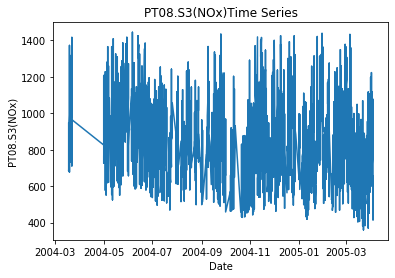

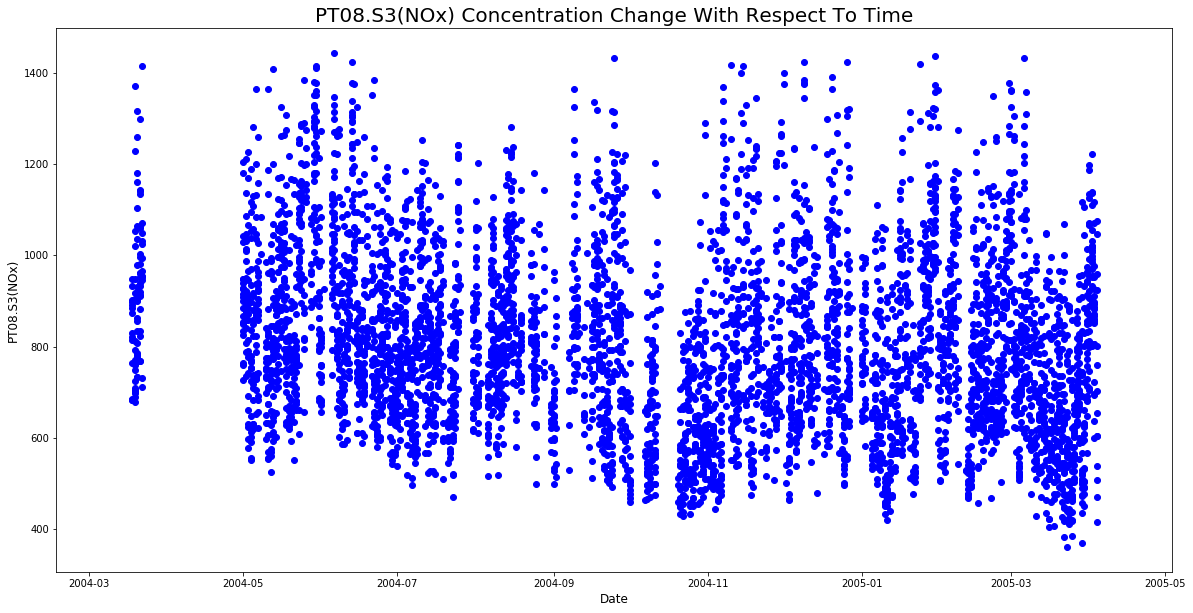

In [26]:
#PT08.S3(NOx)
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)



dataslice = aqDataSet[['Date','PT08.S3(NOx)']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['PT08.S3(NOx)']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['PT08.S3(NOx)'])

plt.title('PT08.S3(NOx)Time Series')

plt.xlabel('Date')
plt.ylabel('PT08.S3(NOx)')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("PT08.S3(NOx) Concentration Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("PT08.S3(NOx)", fontsize = 12)
plt.show()

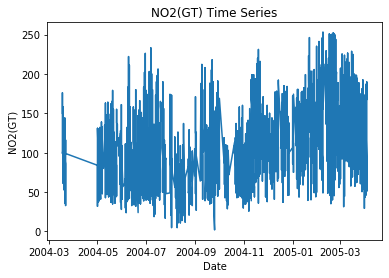

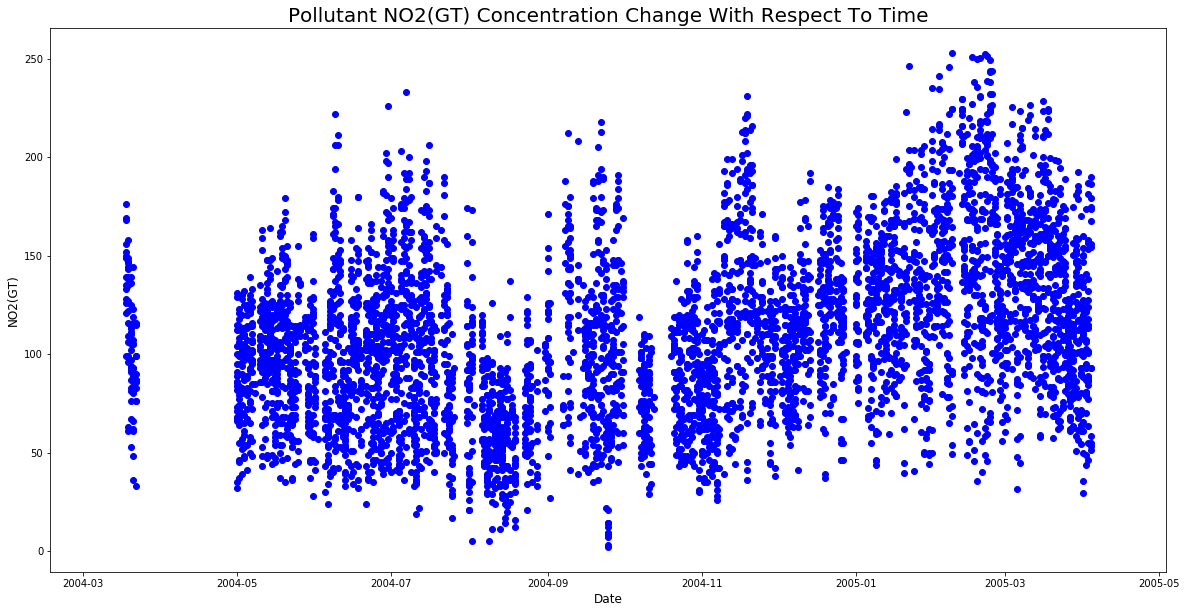

In [27]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)


dataslice = aqDataSet[['Date','NO2(GT)']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['NO2(GT)']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['NO2(GT)'])

plt.title('NO2(GT) Time Series')

plt.xlabel('Date')
plt.ylabel('NO2(GT)')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Pollutant NO2(GT) Concentration Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("NO2(GT)", fontsize = 12)
plt.show()

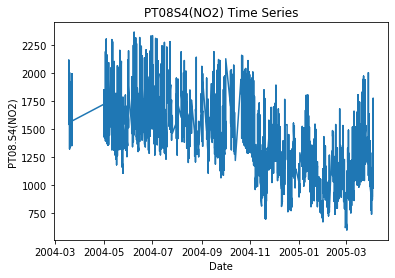

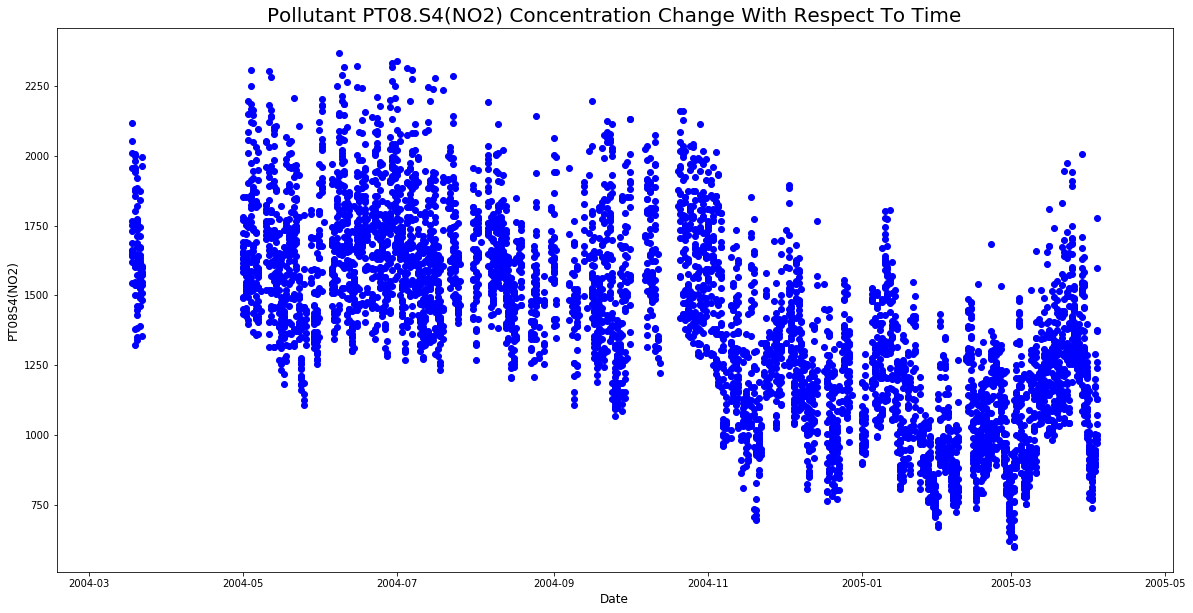

In [28]:
#PT08.S4(NO2)
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns



#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)



dataslice = aqDataSet[['Date','PT08.S4(NO2)']]
column1 = pd.to_datetime(aqDataSet['Date'])
column2 = aqDataSet['PT08.S4(NO2)']

aqDataSet ['Date'] = pd.to_datetime(aqDataSet["Date"])
aqDataSet = aqDataSet.set_index('Date')

fig, ax = plt.subplots()
ax.plot(aqDataSet.index, aqDataSet['PT08.S4(NO2)'])

plt.title('PT08S4(NO2) Time Series')

plt.xlabel('Date')
plt.ylabel('PT08.S4(NO2)')

plt.figure(figsize=(20,10))
plt.scatter(column1, column2, color='blue', marker='o')
plt.title("Pollutant PT08.S4(NO2) Concentration Change With Respect To Time", fontsize = 20)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("PT08S4(NO2)", fontsize = 12)
plt.show()

          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
184 2004-03-18  10:00:00     4.5      1616.50      -200  21.312687   
185 2004-03-18  11:00:00     2.8      1472.75      -200  14.305786   
186 2004-03-18  12:00:00     2.2      1378.50      -200  12.521106   
187 2004-03-18  13:00:00     2.2      1385.25      -200  12.192364   
188 2004-03-18  14:00:00     2.3      1378.75      -200  13.092245   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
184        1332.50    349.0        685.75    150.0       2010.00      1818.50   
185        1126.50    224.0        830.50    152.0       1752.00      1567.75   
186        1067.50    171.0        898.75    139.0       1662.50      1373.50   
187        1056.25    149.0        891.00    133.0       1648.00      1267.50   
188        1086.75    137.0        901.25    126.0       1660.25      1143.50   

             T      RH        AH  
184  17.850000  40.525  0.820964  
185  20.800001  34.450

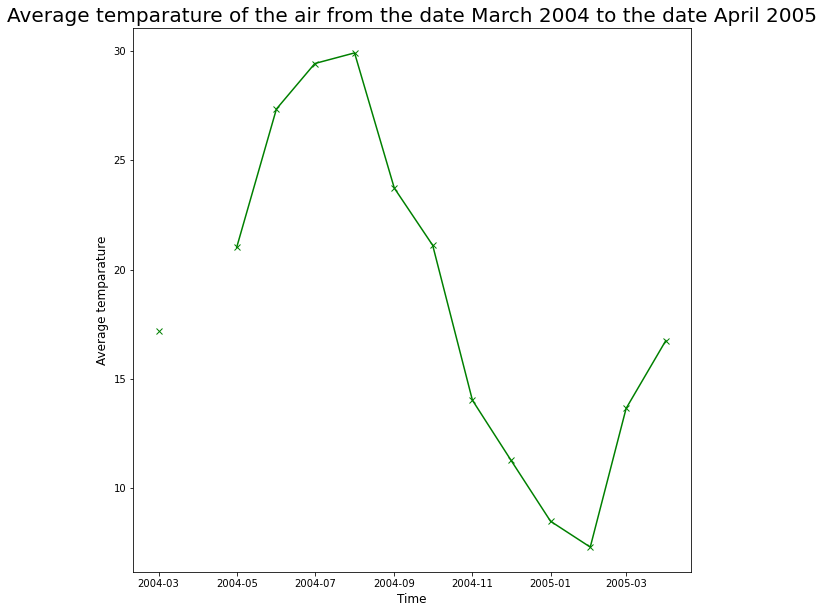

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#load dataset and only choose category for furniture
#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)

print(aqDataSet.head())
print("\n")

#Find the start and end date for  data recording
print('The earliest and the end date of data recording related to Air Quality')
print(aqDataSet['Date'].min(), aqDataSet['Date'].max())
print("\n")

#Check whether there is any missing data for furniture
print(aqDataSet.isnull().sum())
print("\n")

#Index Time Series Data, Order Date
aqDataSet = aqDataSet.set_index('Date')
print(aqDataSet.index)
print("\n")

#We shall obtain the average sales for each month (MS)
month_average = aqDataSet['T'].resample('MS').mean()

 
#Plot the Furniture Sales Time Series Data for only 2017
plt.figure(figsize=(10,10))
plt.plot(month_average, color='green', marker='x')
plt.title("Average temparature of the air from the date March 2004 to the date April 2005", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average temparature", fontsize = 12)
plt.show()


          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
184 2004-03-18  10:00:00     4.5      1616.50      -200  21.312687   
185 2004-03-18  11:00:00     2.8      1472.75      -200  14.305786   
186 2004-03-18  12:00:00     2.2      1378.50      -200  12.521106   
187 2004-03-18  13:00:00     2.2      1385.25      -200  12.192364   
188 2004-03-18  14:00:00     2.3      1378.75      -200  13.092245   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
184        1332.50    349.0        685.75    150.0       2010.00      1818.50   
185        1126.50    224.0        830.50    152.0       1752.00      1567.75   
186        1067.50    171.0        898.75    139.0       1662.50      1373.50   
187        1056.25    149.0        891.00    133.0       1648.00      1267.50   
188        1086.75    137.0        901.25    126.0       1660.25      1143.50   

             T      RH        AH  
184  17.850000  40.525  0.820964  
185  20.800001  34.450

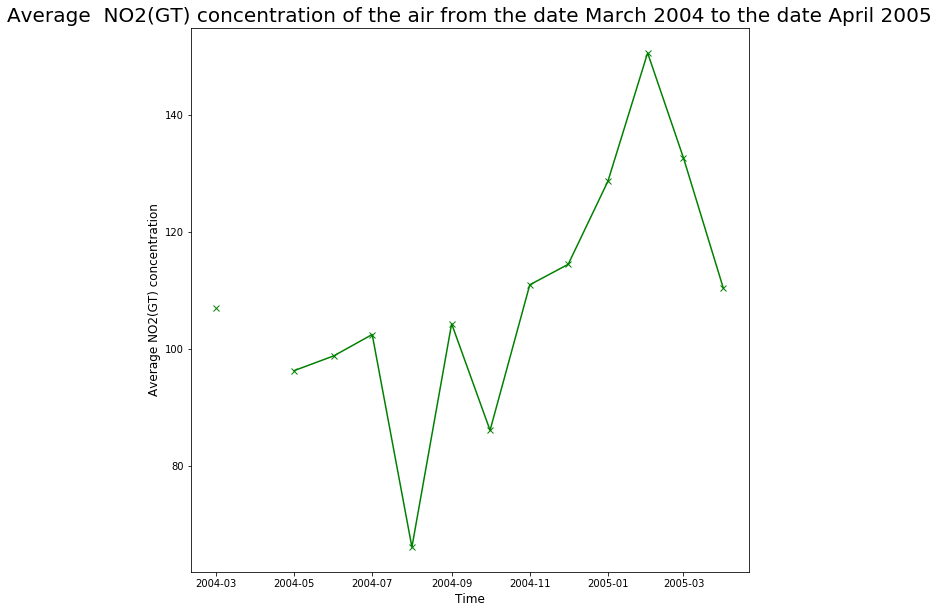

In [157]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#load dataset and only choose category for furniture
#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)

print(aqDataSet.head())
print("\n")

#Find the start and end date for  data recording
print('The earliest and the end date of data recording related to Air Quality')
print(aqDataSet['Date'].min(), aqDataSet['Date'].max())
print("\n")

#Check whether there is any missing data for furniture
print(aqDataSet.isnull().sum())
print("\n")

#Index Time Series Data, Order Date
aqDataSet = aqDataSet.set_index('Date')
print(aqDataSet.index)
print("\n")

#We shall obtain the average sales for each month (MS)
month_average = aqDataSet['NO2(GT)'].resample('MS').mean()

 
#Plot the Furniture Sales Time Series Data for only 2017
plt.figure(figsize=(10,10))
plt.plot(month_average, color='green', marker='x')
plt.title("Average  NO2(GT) concentration of the air from the date March 2004 to the date April 2005", fontsize = 20)
plt.xlabel("Time", fontsize = 12)
plt.ylabel("Average NO2(GT) concentration", fontsize = 12)
plt.show()

In [52]:
# can Auto Regression model can be used in forecasting NO2(GT) concentration
#https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas import concat
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
 

#load dataset and only choose category for furniture
#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)

aqDataSet1 = aqDataSet[["Date", "NO2(GT)"]]
aqDataSet1.set_index("Date", inplace=True)
X=aqDataSet1.values
print(X)


[[150. ]
 [152. ]
 [139. ]
 ...
 [174.7]
 [155.7]
 [167.7]]


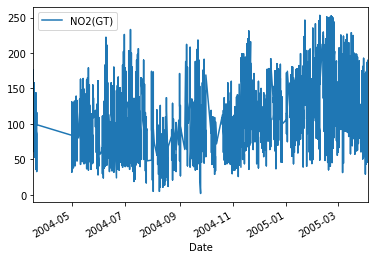

In [53]:
aqDataSet1.plot()

In [61]:
#check for stationary
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(aqDataSet1["NO2(GT)"])
print('1.ADF : ', dftest[0])
print('2.P-VALUE : ', dftest[1])
print('3.No of Lags: ', dftest[2])
print('4.Number of observations used for ADF regression and Critical Values calculations: ', dftest[3])
print('5.Critical values: ')
for key , val in dftest[4].items():
    print("\t", key, ":", val)

1.ADF :  -6.127024784220039
2.P-VALUE :  8.580039893230467e-08
3.No of Lags:  24
4.Number of observations used for ADF regression and Critical Values calculations:  5438
5.Critical values: 
	 1% : -3.4315530874370572
	 5% : -2.862071643977393
	 10% : -2.567052993113314


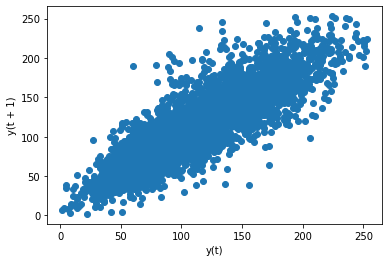

In [62]:
lag_plot(aqDataSet1)

C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


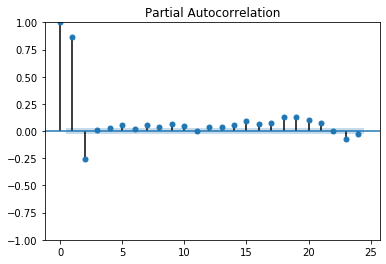

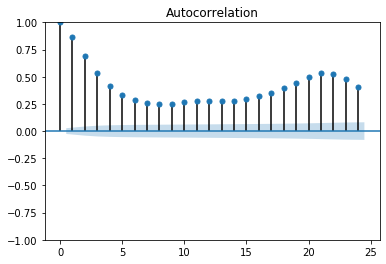

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

pacf = plot_pacf(aqDataSet1["NO2(GT)"], lags = 24)
acf = plot_acf(aqDataSet1["NO2(GT)"], lags = 24)

In [82]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [84]:
model = AutoReg(train, lags =8).fit()

In [85]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 5456
Model:                     AutoReg(8)   Log Likelihood              -24163.272
Method:               Conditional MLE   S.D. of innovations             20.416
Date:                Sun, 18 Dec 2022   AIC                          48346.544
Time:                        15:36:44   BIC                          48412.574
Sample:                             8   HQIC                         48369.586
                                 5456                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6796      0.961     15.269      0.000      12.795      16.564
y.L1           1.0926      0.014     80.682      0.000       1.066       1.119
y.L2          -0.2608      0.020    -13.004      0.0

In [86]:
pred = model.predict(start=len(train), end=len(X)-1, dynamic=False)

[164.59256145 157.3557076  143.97738523 131.12298095 122.21168091
 115.12645001 111.74410253]


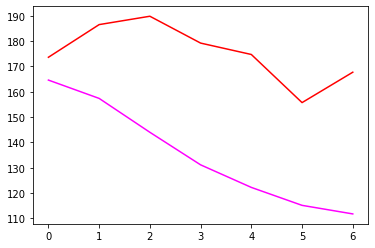

In [87]:
from matplotlib import pyplot
pyplot.plot(pred,'magenta')
pyplot.plot(test, color ='red')
print(pred)

In [88]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

42.8851199232848


The Future predictions for the next week
[114.55427657 116.39050473 117.19234952 116.99026429 116.1996592
 115.09123109 113.96302839]
Number of predictions Made : 	 7


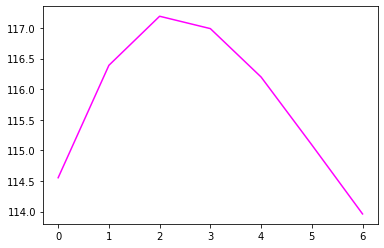

In [89]:
#Making future predictions 
pred_future = model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
print("The Future predictions for the next week")
print(pred_future)
print('Number of predictions Made : \t', len(pred_future))
pyplot.plot(pred_future,'magenta')

In [91]:
# can Autoregressive Integrated Moving Average(ARIMA) can be used in forecasting NO2(GT) concentration
!pip install pmdarima


  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4


ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.


In [97]:
import pandas as pd
import numpy as np


#load dataset and only choose category for furniture
#remove outliers from the air quality data set
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx", index_col = 'Date', parse_dates=True)
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

aqDataSet = remove(aqDataSet_raw, index_list)

aqDataSet1 = aqDataSet[["Date", "NO2(GT)"]]
aqDataSet1.set_index("Date", inplace=True)
aqDataSet1 = aqDataSet1.dropna()
aqDataSet1.head()



,NO2(GT)
Date,
2004-03-18,150.0
2004-03-18,152.0
2004-03-18,139.0
2004-03-18,133.0
2004-03-18,126.0


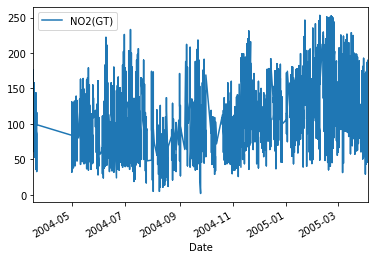

In [98]:
aqDataSet1.plot()

In [104]:
#check for stationary
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(aqDataSet1["NO2(GT)"])
print('1.ADF : ', dftest[0])
print('2.P-VALUE : ', dftest[1])
print('3.No of Lags: ', dftest[2])
print('4.Number of observations used for ADF regression and Critical Values calculations: ', dftest[3])
print('5.Critical values: ')
for key , val in dftest[4].items():
    print("\t", key, ":", val)

1.ADF :  -6.127024784220039
2.P-VALUE :  8.580039893230467e-08
3.No of Lags:  24
4.Number of observations used for ADF regression and Critical Values calculations:  5438
5.Critical values: 
	 1% : -3.4315530874370572
	 5% : -2.862071643977393
	 10% : -2.567052993113314


In [135]:

from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(aqDataSet1["NO2(GT)"], order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                NO2(GT)   No. Observations:                 5463
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -24402.856
Date:                Sun, 18 Dec 2022   AIC                          48817.713
Time:                        18:54:44   BIC                          48857.346
Sample:                             0   HQIC                         48831.542
                               - 5463                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1600      0.011     15.064      0.000       0.139       0.181
ar.L2         -0.1022      0.012     -8.418      0.000      -0.126      -0.078
ar.L3         -0.0954      0.013     -7.538      0.0

In [140]:
print(aqDataSet1.shape)
train = aqDataSet1.iloc[:-30]
test = aqDataSet1.iloc[-30:]
print(train.shape,test.shape)

(5463, 1)
(5433, 1) (30, 1)


In [144]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["NO2(GT)"],order= (1,0,5))
model= model.fit()
model.summary()

C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                NO2(GT)   No. Observations:                 5433
Model:                 ARIMA(1, 0, 5)   Log Likelihood              -24040.955
Date:                Sun, 18 Dec 2022   AIC                          48097.909
Time:                        19:04:17   BIC                          48150.711
Sample:                             0   HQIC                         48116.338
                               - 5433                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.9755      6.938     15.851      0.000      96.377     123.574
ar.L1          0.9944      0.002    534.096      0.000       0.991       0.998
ma.L1          0.0546      0.011      4.869      0.000       0.033       0.077
ma.L2         -0.2219      0.012    -18.273      0.000      -0.246      -0.198
ma.L3         -0.2708      0.012    -22.962      0.000      -0.294      -0.248
ma.L4         -0.2782      0.012    -23.661      0.000      -0.301      -0.255
ma.L5         -0.1490      0.012    -11.957      0.000      -0.173      -0.125
sigma2       408.0799      5.646     72.274      0.000     397.013     419.146
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):              1006.80
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start=start,end=end,type='levels')
pred.index=aqDataSet1.index[start:end+1]
print(pred)

C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


Date
2005-04-03     99.250148
2005-04-03    106.935962
2005-04-03    106.195176
2005-04-03    101.754037
2005-04-03     99.303578
2005-04-03     99.363543
2005-04-03     99.423171
2005-04-03     99.482463
2005-04-03     99.541423
2005-04-03     99.600051
2005-04-03     99.658350
2005-04-03     99.716322
2005-04-03     99.773967
2005-04-03     99.831289
2005-04-03     99.888289
2005-04-03     99.944968
2005-04-04    100.001329
2005-04-04    100.057373
2005-04-04    100.113102
2005-04-04    100.168519
2005-04-04    100.223623
2005-04-04    100.278419
2005-04-04    100.332906
2005-04-04    100.387087
2005-04-04    100.440964
2005-04-04    100.494538
2005-04-04    100.547810
2005-04-04    100.600784
2005-04-04    100.653460
2005-04-04    100.705840
Name: predicted_mean, dtype: float64


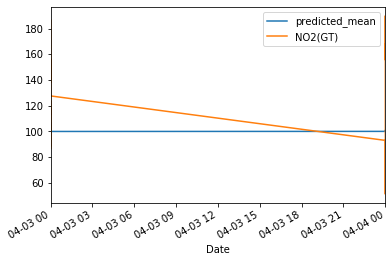

In [148]:
pred.plot(legend= True)
test["NO2(GT)"].plot(legend = True)

In [149]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

51.549236959990566


In [151]:
test["NO2(GT)"].mean()

128.35666666666665

In [152]:
model2 = ARIMA(aqDataSet1["NO2(GT)"], order=(5,1,0))
model2=model2.fit()
aqDataSet1.tail()

C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,NO2(GT)
Date,
2005-04-04,189.8
2005-04-04,179.2
2005-04-04,174.7
2005-04-04,155.7
2005-04-04,167.7


C:\Users\Thanuja\AppData\Local\conda\conda\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


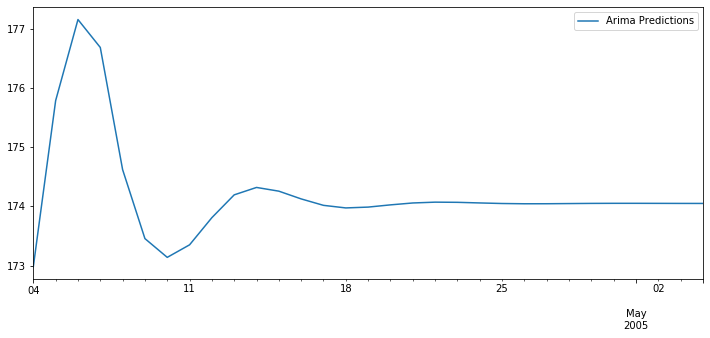

In [154]:
index_future_dates = pd.date_range(start = '2005-04-04', end= "2005-05-04")
pred = model2.predict(start=len(aqDataSet1),end=len(aqDataSet1)+30,typ='levels').rename("Arima Predictions")
pred.index= index_future_dates
pred.plot(figsize=(12,5), legend = True)